In [ ]:
## Jack's FIFA 22 dataset

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [118]:
fifa_22 = pd.read_csv("files/fifa_22.csv")
fifa_21 = pd.read_csv("files/fifa_21.csv")
fifa_20 = pd.read_csv("files/fifa_20.csv")

/Users/JackReynolds/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [119]:
print(fifa_22.shape), print(fifa_21.shape), print(fifa_20.shape)

(19239, 110)
(18944, 110)
(18483, 110)


(None, None, None)

In [94]:

f22 = fifa_22.drop(['player_positions','sofifa_id', 'player_url', 'long_name', 'value_eur','dob','club_team_id','club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nation_team_id', 'nation_position','dob','club_team_id','club_jersey_number', 'nation_jersey_number', 'body_type', 'real_face', 'release_clause_eur', 'ls','st','rs','lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam','ram','lm','lcm', 'cm', 'rcm', 'rm','lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb','cb','rcb','rb', 'gk', 'player_face_url', 'club_logo_url', 'club_flag_url', 'nation_logo_url','nation_flag_url', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed'], axis=1)
f21 = fifa_21.drop(['player_positions','sofifa_id', 'player_url', 'long_name', 'value_eur','dob','club_team_id','club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nation_team_id', 'nation_position','dob','club_team_id','club_jersey_number', 'nation_jersey_number', 'body_type', 'real_face', 'release_clause_eur', 'ls','st','rs','lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam','ram','lm','lcm', 'cm', 'rcm', 'rm','lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb','cb','rcb','rb', 'gk', 'player_face_url', 'club_logo_url', 'club_flag_url', 'nation_logo_url','nation_flag_url', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed'], axis=1)
f20 = fifa_20.drop(['player_positions','sofifa_id', 'player_url', 'long_name', 'value_eur','dob','club_team_id','club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nation_team_id', 'nation_position','dob','club_team_id','club_jersey_number', 'nation_jersey_number', 'body_type', 'real_face', 'release_clause_eur', 'ls','st','rs','lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam','ram','lm','lcm', 'cm', 'rcm', 'rm','lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb','cb','rcb','rb', 'gk', 'player_face_url', 'club_logo_url', 'club_flag_url', 'nation_logo_url','nation_flag_url', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed'], axis=1)


In [193]:
print(f20.shape), (f21.shape), (f21.shape)

(18483, 54)


(None, (6645, 55), (6645, 55))

In [67]:
f21.head()

,short_name,overall,potential,wage_eur,age,height_cm,weight_kg,club_name,league_name,league_level,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
0,L. Messi,93,93,560000.0,33,170,72,FC Barcelona,Spain Primera Division,1.0,...,94,44,40,93,95,75,96,32,35,24
1,Cristiano Ronaldo,92,92,220000.0,35,187,83,Juventus,Italian Serie A,1.0,...,93,63,29,95,82,84,95,28,32,24
2,R. Lewandowski,91,91,240000.0,31,184,80,FC Bayern München,German 1. Bundesliga,1.0,...,85,81,49,94,79,88,88,35,42,19
3,Neymar Jr,91,91,270000.0,28,175,68,Paris Saint-Germain,French Ligue 1,1.0,...,84,51,36,87,90,92,93,35,30,29
4,K. De Bruyne,91,91,370000.0,29,181,70,Manchester City,English Premier League,1.0,...,91,76,66,88,94,84,91,68,65,53


In [231]:
## There are multiple sub-positions within positions in FIFA. 
## An example of this is how Left wing backs, left backs, center backs, right center backs and right wing backs are all defenders.
##These sub-positions within positions make it hard to visualise graphs, so we categorised 3 general positions for easier visualisations

def label_pos (row):
    
    if(row.club_position == "RB" or row.club_position == "CB" or row.club_position == "LB" or 
       row.club_position == "LWB" or row.club_position == "RCB"or row.club_position == "RWB" or 
       row.club_position == "LCB"):
        return 'Defender'
    if(row.club_position == "RM" or row.club_position == "CM" or row.club_position == "LM"
       or row.club_position == "CAM" or row.club_position == "LDM" or row.club_position == "RDM"
      or row.club_position == "LAM"or row.club_position == "RAM" or row.club_position == "CDM"
       or row.club_position == "RCM"or row.club_position == "LCM"):
        return 'MidFielder'
    if(row.club_position == "RW" or row.club_position == "CF" or row.club_position == "LW" or 
       row.club_position == "ST" or row.club_position == "RS"or row.club_position == "LS"
       or row.club_position == "LF"or row.club_position == "RF"):
        return 'Forward'
 

f21['field_position'] = f21.apply (lambda row: label_pos(row), axis=1)

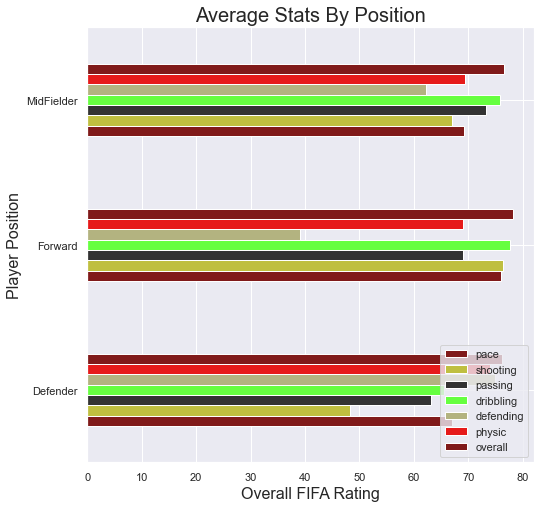

In [290]:
custom_colours = [(0.5,0.1,0.1), (0.75, 0.75, 0.25), (0.2,0.2,0.2), (0.4, 1, 0.25), (0.7,0.7,0.5), (0.9, 0.1, 0.1),]*5

ratingsByPositions = f21.groupby([f21['field_position']]).mean()
ratingsByPositions = ratingsByPositions
ratingsByPositions = ratingsByPositions[['pace','shooting','passing','dribbling','defending','physic','overall']]
ratingsByPositions.plot(kind='barh', figsize=(8,8), color=custom_colours)

plt.title('Average Stats By Position',fontsize=20)
plt.xlabel('Overall FIFA Rating',fontsize=16)
plt.ylabel('Player Position',fontsize=16);

# The Above bar graph illustrates the average stats from the 3 main positions

## Midfielders on average, have the highest stats and are more well rounded than forwards and defenders

## Forwards are the fastest and possess the highest dribbling stats, although midfielders are not far behind

## Defenders are the most physical of the 3 main positions, their shooting is significantly weaker in comparison to midfielders and forwards

In [249]:
## This code prepares the following scatterplot by cleaning the data of irrelevant leagues 
##which we do not want to be analysed

for index, row in f21.iterrows():
     if row['league_name'] == "English League Two":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Danish Superliga":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Saudi Abdul L. Jameel League":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Liga de FÃºtbol Profesional Boliviano":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Colombian Liga PostobÃ³n":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Mexican Liga MX":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Polish T-Mobile Ekstraklasa":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Scottish Premiership":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "USA Major League Soccer":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Saudi Abdul L. Jameel League":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Romanian Liga I":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "German 2. Bundesliga":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Norwegian Eliteserien":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Swedish Allsvenskan":
        f21.drop(index, inplace=True)

for index, row in f21.iterrows():
     if row['league_name'] == "Australian Hyundai A-League":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Korean K League 1":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Ecuadorian Serie A":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "German 3. Bundesliga":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Chilian Campeonato Nacional":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Rep. Ireland Airtricity League":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Chinese Super League":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "French Ligue 2":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Greek Super League":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "English League Championship":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Holland Eredivisie":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Portuguese Liga ZON SAGRES":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Japanese J. League Division 1":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Belgian Jupiler Pro League":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Ukrainian Premier League":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Croatian Prva HNL":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "English League One":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "South African Premier Division":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Finnish Veikkausliiga":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Austrian Football Bundesliga":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Swiss Super League":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Czech Republic Gambrinus Liga":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Italian Serie B":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "UAE Arabian Gulf League":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Turkish Süper Lig":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Campeonato Brasileiro Série A":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Argentina Primera División":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Venezuelan Primera División":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Peruvian Primera División":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Paraguayan Primera División":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Uruguayan Primera División":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Colombian Liga Postobón":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Spanish Segunda División":
        f21.drop(index, inplace=True)
        
for index, row in f21.iterrows():
     if row['league_name'] == "Liga de Fútbol Profesional Boliviano":
        f21.drop(index, inplace=True)

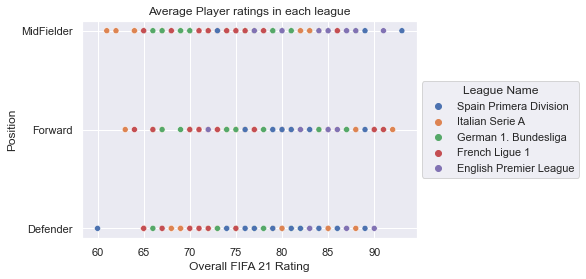

In [279]:
##Player ratings in each league

sns.scatterplot(data=f21, x="overall", y="field_position", hue="league_name")

plt.title('Average Player ratings in each league') #title
plt.xlabel('Overall FIFA 21 Rating') #x label
plt.ylabel('Position') #y label
plt.legend(title='League Name',loc='center', bbox_to_anchor=(1.25, 0.5),)


## We can see that defenders in Spain are the weakest in the top 5 leagues
## However, the Spanish league has the strongest midfielders in the top 5 leagues